<a href="https://colab.research.google.com/github/Kantethiara/Hack2Hiere_TechTech_DataScience_81/blob/main/Databeez_scoring_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DataBeez Hack2Hire Test Technique - Data Science
##Projet : Credit Scoring
Auteur: *Thiara KANTEYE*

### **I.Introduction**

Le *Credit Scoring* est un outil crucial dans le secteur financier, utilisé pour évaluer la capacité d'un individu ou d'une entreprise à rembourser un crédit. Grâce à des données historiques et des algorithmes de machine learning, les institutions financières peuvent prédire la probabilité qu'un client soit en mesure de respecter ses engagements financiers. Ce processus améliore la gestion des risques tout en facilitant une prise de décision rapide et précise pour l'octroi de crédits.

Dans ce projet, nous travaillons avec la base de données **German Credit Data**, qui contient des informations détaillées sur les caractéristiques socio-économiques et financières des individus. L'objectif principal est de développer un modèle de prédiction permettant de déterminer si une demande de crédit représente un *bon risque* ou un *mauvais risque*.

Les principales étapes de ce projet incluent :
1. **Exploration et analyse des données** : Comprendre les variables clés, détecter les relations significatives et identifier les facteurs les plus influents sur l'octroi de crédit.
2. **Préparation des données** : Nettoyer, encoder et transformer les données pour rendre le jeu de données compatible avec les algorithmes de machine learning.
3. **Développement d’un modèle prédictif** : Entraîner et évaluer plusieurs algorithmes pour sélectionner celui offrant les meilleures performances en termes de précision et de robustesse.
4. **Déploiement et visualisation** : Créer un fichier Docker pour le déploiement du modèle et développer un tableau de bord interactif via **Power BI** ou **Looker Studio** afin de rendre les résultats compréhensibles et accessibles aux décideurs.

Ce projet s'inscrit dans une logique d'application concrète des sciences des données pour résoudre un problème réel. Il démontre comment les outils de machine learning, associés à une infrastructure moderne (comme Docker pour le déploiement), peuvent transformer les données en informations exploitables, renforçant ainsi les capacités de prise de décision stratégique dans le domaine du crédit.

### 1.Exploration et analyse des données

In [2]:
#Importer les bibliothéque requise
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

In [3]:
#Chargement de la base de donnees
from google.colab import files
files.upload()


Saving german_credit_data.csv to german_credit_data (1).csv


{'german_credit_data (1).csv': b',Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk\n0,67,male,2,own,NA,little,1169,6,radio/TV,good\n1,22,female,2,own,little,moderate,5951,48,radio/TV,bad\n2,49,male,1,own,little,NA,2096,12,education,good\n3,45,male,2,free,little,little,7882,42,furniture/equipment,good\n4,53,male,2,free,little,little,4870,24,car,bad\n5,35,male,1,free,NA,NA,9055,36,education,good\n6,53,male,2,own,quite rich,NA,2835,24,furniture/equipment,good\n7,35,male,3,rent,little,moderate,6948,36,car,good\n8,61,male,1,own,rich,NA,3059,12,radio/TV,good\n9,28,male,3,own,little,moderate,5234,30,car,bad\n10,25,female,2,rent,little,moderate,1295,12,car,bad\n11,24,female,2,rent,little,little,4308,48,business,bad\n12,22,female,2,own,little,moderate,1567,12,radio/TV,good\n13,60,male,1,own,little,little,1199,24,car,bad\n14,28,female,2,rent,little,little,1403,15,car,good\n15,32,female,1,own,moderate,little,1282,24,radio/TV,bad\n16,53,male,2,own,NA,NA,2424

In [4]:
#Importer la base de donnees
df = pd.read_csv('german_credit_data.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
!pip install -U ydata-profiling

In [6]:
from ydata_profiling import ProfileReport

# Créer le rapport de profilage
profile = ProfileReport(df, title="Profiling Report de credit_data.csv", explorative=True)

# Afficher le rapport dans un notebook Jupyter
profile.to_notebook_iframe()

# Exporter le rapport en fichier HTML
profile.to_file("rapport_credit_data.html")



Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### **Analyse du ProfileReport**

Le *ProfileReport* fournit une vue d’ensemble détaillée des variables composant notre base de données. Celle-ci est constituée de **1 000 observations** réparties sur **10 colonnes**, comprenant :  
- **3 variables catégoriques**,  
- **7 variables numériques**.  

### **Constats initiaux** :
- **Absence de doublons** : Aucune ligne dupliquée n’a été détectée (Duplicate rows : 0).  
- **Valeurs manquantes** : Deux variables contiennent des données manquantes :  
  - Saving accounts (817 valeurs manquantes),  
  - Checking account (606 valeurs manquantes).  

### **Analyse univariée**  

1. **Age**  
   - Âge minimum : **19 ans**  
   - Âge maximum : **75 ans**  
   - Âge moyen : **36 ans**

2. **Sexe**  
   - Hommes : **690 individus** (majoritaires)  
   - Femmes : **310 individus**

3. **Job**  
   - Répartition des statuts professionnels :  
     - **630 clients** : statut qualifié (*skilled*).  
     - **200 clients** : non qualifié et résident (*unskilled and resident*).  
     - **148 clients** : hautement qualifié (*highly skilled*).  
     - **22 clients** : non qualifié et non résident (*unskilled and non-resident*).

4. **Housing**  
   - Propriétaires de leur logement : **713 individus** (majoritaires).  
   - Locataires : **170 individus**.  
   - Statut d’habitation gratuit : **108 individus**.

5. **Saving et Checking accounts**  
   - Les comptes avec de **petites sommes d'argent** ou des **sommes modérées** sont les plus fréquents, contrairement aux comptes dits **riches** ou **très riches**, qui sont rares dans notre jeu de données.

6. **Credit amount**  
   - Montant minimum de crédit : **250 DM**.  
   - Montant maximum de crédit : **18 424 DM**.  
   - Montant moyen de crédit : **3 271 DM**.

7. **Duration**  
   - Durée moyenne des prêts : **21 mois**.

8. **Purpose**  
   - Les motifs les plus fréquents de prêts concernent :  
     - **L’achat de voitures**,  
     - **Les appareils radio/TV**,  
     - **Les fournitures/équipements**.  
   - Les motifs moins fréquents incluent :  
     - **Les affaires**,  
     - **L’éducation**,  
     - **Les autres motifs divers**.

9. **Risk**  
   - **700 clients** sont classés comme ayant un *bon risque* (majoritaires).  
   - **300 clients** sont classés comme ayant un *mauvais risque*.


### **Analyse bivariée**

Lors d’une première analyse des corrélations :  
- Une forte relation est observée entre **Credit amount** et **Duration**.  

### **Étapes suivantes**  

Nous approfondirons ces observations grâce à des visualisations graphiques pour valider et enrichir les conclusions tirées du rapport de profilage. Ces graphiques permettront d’identifier d’éventuelles tendances cachées et d’obtenir des insights plus clairs sur les relations entre les différentes variables de la base de données.

In [7]:
# Identifier les valeurs manquantes
missing_data = df.isnull().sum() / len(df) * 100
print("Pourcentage de valeurs manquantes :\n", missing_data)


Pourcentage de valeurs manquantes :
 Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
Risk                 0.0
dtype: float64


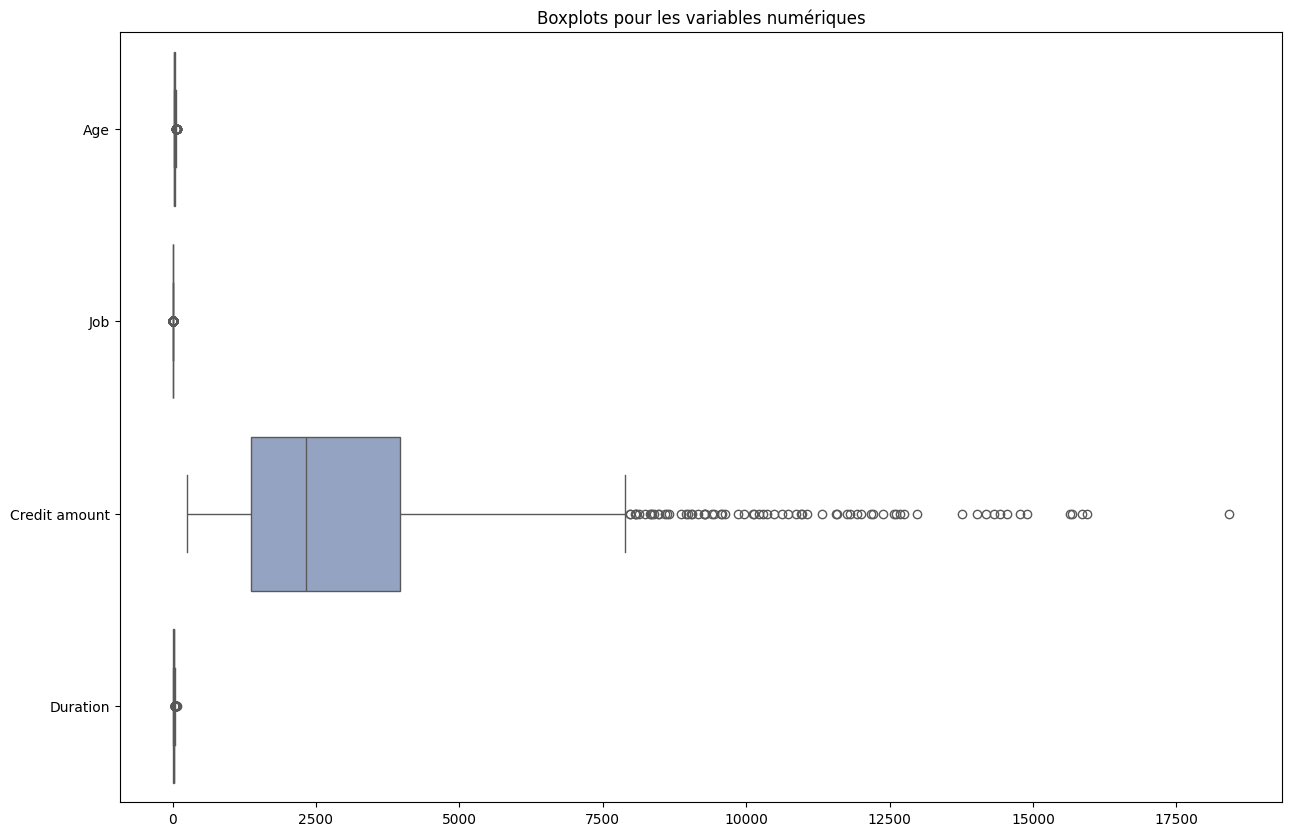

In [8]:
#Présence ou non de données abérrantes

# Sélectionner uniquement les colonnes numériques
numeric_df = df.select_dtypes(include=[np.number])

# Créer un boxplot pour chaque variable numérique
plt.figure(figsize=(15, 10))  # Taille de la figure pour plus de lisibilité
sns.boxplot(data=numeric_df, orient='h', palette='Set2')
plt.title('Boxplots pour les variables numériques')
plt.show()


In [9]:
fig_box = px.box(
    df,
    x='Risk',
    y='Credit amount',
    color='Risk',
    title='Distribution du montant de crédit selon le risque',
    labels={'Risk': 'Risque', 'Credit amount': 'Montant du crédit (DM)'}
)
fig_box.update_layout(autosize=True, template='plotly_dark')
fig_box.show()


In [10]:
fig_scatter = px.scatter(
    df,
    x='Credit amount',
    y='Duration',
    color='Risk',
    title='Nuage de points : Montant du crédit vs Durée',
    labels={'Credit amount': 'Montant du crédit (DM)', 'Duration': 'Durée (mois)'},
    hover_data=['Age', 'Job']
)
fig_scatter.update_layout(template='plotly_dark')
fig_scatter.show()


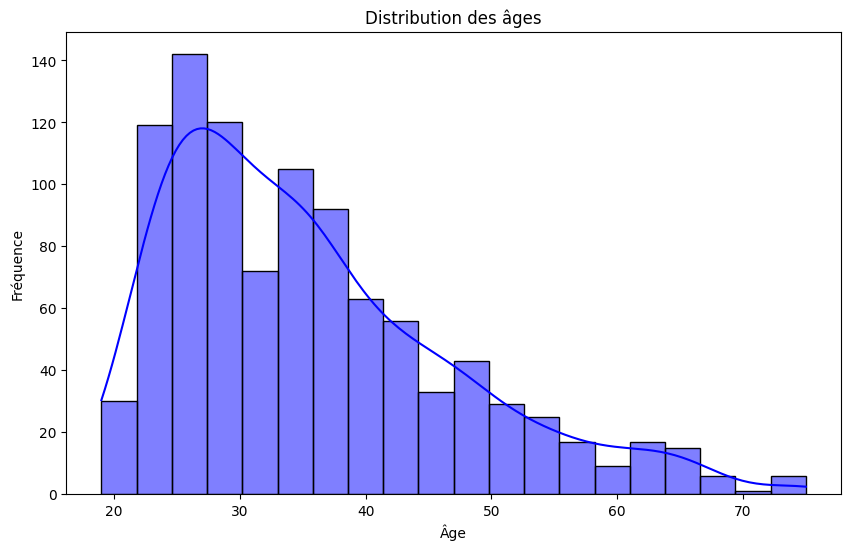

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer l'histogramme avec KDE
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=20, color="blue", edgecolor="black")
plt.title("Distribution des âges")
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()


In [12]:
# Test de Chi-carré pour les variables catégoriques


#Pour la variable 'Housing'
contingency_table = pd.crosstab(df['Housing'], df['Risk'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Statistique Chi2 pour la variable Housing : {chi2}, p-valeur : {p}")

#Pour la variable 'Job'
contingency_table = pd.crosstab(df['Job'], df['Risk'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Statistique Chi2 pour la variable Job : {chi2}, p-valeur : {p}")

#Pour la variable 'Sex'
contingency_table = pd.crosstab(df['Sex'], df['Risk'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Statistique Chi2 pour la variable Sex : {chi2}, p-valeur : {p}")

#Pour la variable 'Saving account'
contingency_table = pd.crosstab(df['Saving accounts'], df['Risk'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Statistique Chi2 pour la variable Saving account : {chi2}, p-valeur : {p}")

#Pour la variable 'Checking account'
contingency_table = pd.crosstab(df['Checking account'], df['Risk'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Statistique Chi2 pour la variable Checking account : {chi2}, p-valeur : {p}")

#Pour la variable 'Purpose'
contingency_table = pd.crosstab(df['Housing'], df['Risk'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Statistique Chi2 pour la variable Purpose : {chi2}, p-valeur : {p}")






Statistique Chi2 pour la variable Housing : 18.19984158256362, p-valeur : 0.00011167465374597684
Statistique Chi2 pour la variable Job : 1.8851560280131707, p-valeur : 0.5965815918843431
Statistique Chi2 pour la variable Sex : 5.348516218081436, p-valeur : 0.020739913068713305
Statistique Chi2 pour la variable Saving account : 18.479089902588285, p-valeur : 0.00035029499291971256
Statistique Chi2 pour la variable Checking account : 17.04082801454835, p-valeur : 0.00019935687308106684
Statistique Chi2 pour la variable Purpose : 18.19984158256362, p-valeur : 0.00011167465374597684


In [13]:
#Test d’ANOVA pour les variables numériques (Credit amount)


# Regrouper les données par risque
bon_risque = df[df['Risk'] == 0]['Credit amount']
mauvais_risque = df[df['Risk'] == 1]['Credit amount']

# Effectuer un test ANOVA
f_stat, p_val = f_oneway(bon_risque, mauvais_risque)

print("Test ANOVA pour le montant du crédit et le risque :")
print(f"Statistique F : {f_stat}")
print(f"P-valeur : {p_val}")

# Interpréter les résultats
alpha = 0.05  # Niveau de signification
if p_val < alpha:
    print("Il existe une différence statistiquement significative dans le montant du crédit entre les groupes à bon risque et à mauvais risque.")
else:
    print("Il n'y a pas de différence statistiquement significative dans le montant du crédit entre les groupes à bon risque et à mauvais risque.")


Test ANOVA pour le montant du crédit et le risque :
Statistique F : nan
P-valeur : nan
Il n'y a pas de différence statistiquement significative dans le montant du crédit entre les groupes à bon risque et à mauvais risque.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning:

at least one input has length 0



In [14]:
#Test d’ANOVA pour les variables numériques (Duration)

# Regrouper les données par risque
bon_risque = df[df['Risk'] == 0]['Duration']
mauvais_risque = df[df['Risk'] == 1]['Duration']

# Effectuer un test ANOVA
f_stat, p_val = f_oneway(bon_risque, mauvais_risque)

print("Test ANOVA pour la durée et le risque :")
print(f"Statistique F : {f_stat}")
print(f"P-valeur : {p_val}")

# Interpréter les résultats
alpha = 0.05  # Niveau de signification
if p_val < alpha:
    print("Il existe une différence statistiquement significative dans la durée entre les groupes à bon risque et à mauvais risque.")
else:
    print("Il n'y a pas de différence statistiquement significative dans la durée entre les groupes à bon risque et à mauvais risque.")


Test ANOVA pour la durée et le risque :
Statistique F : nan
P-valeur : nan
Il n'y a pas de différence statistiquement significative dans la durée entre les groupes à bon risque et à mauvais risque.


In [15]:
#Test d’ANOVA pour les variables numériques (Duration)

# Regrouper les données par risque
bon_risque = df[df['Risk'] == 0]['Age']
mauvais_risque = df[df['Risk'] == 1]['Age']

# Effectuer un test ANOVA
f_stat, p_val = f_oneway(bon_risque, mauvais_risque)

print("Test ANOVA pour l'Age et le risque :")
print(f"Statistique F : {f_stat}")
print(f"P-valeur : {p_val}")

# Interpréter les résultats
alpha = 0.05  # Niveau de signification
if p_val < alpha:
    print("Il existe une différence statistiquement significative dans la durée entre les groupes à bon risque et à mauvais risque.")
else:
    print("Il n'y a pas de différence statistiquement significative dans la durée entre les groupes à bon risque et à mauvais risque.")


Test ANOVA pour l'Age et le risque :
Statistique F : nan
P-valeur : nan
Il n'y a pas de différence statistiquement significative dans la durée entre les groupes à bon risque et à mauvais risque.


#### **Conclusion pour l'exploration des données :**  
L'analyse exploratoire, incluant profilage, visualisations et tests statistiques, a permis de mieux comprendre les données et d’identifier les facteurs influents sur l'octroi de crédit :  

- **Structure des données** : 1 000 observations, 10 variables (3 catégorielles, 7 numériques) et des valeurs manquantes dans **Saving accounts** (18,3 %) et **Checking account** (39,4 %).  
- **Observations clés** :  
  - L’âge est asymétrique à droite, avec une moyenne de 36 ans.  
  - La majorité des clients sont des hommes (69 %) et des propriétaires (71 %).  
  - Les crédits sont souvent liés à l’achat de voitures, de radios/TV ou de meubles.  
  - Les **bons risques** (70 %) dominent les **mauvais risques** (30 %).
  - Notre variable **credit amount** présente des valeurs extremes ce qui nécessitera une normalisation lors de la préparation des données.
- **Relations significatives** :  
  - Les variables influentes sur le risque incluent **Credit amount**, **Duration**, **Saving accounts**, **Checking account**, **Purpose** et **Housing**.  
  - **Sex** a une significativité faible avec le risque
  - **Job** n’a pas de lien significatif avec le risque.  



### 2.Préparation des données

In [16]:
#importer les bibliotheques requises
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split




In [17]:
# Imputation des valeurs manquantes pour 'Saving accounts' et 'Checking account'
# Utilisation de la méthode de la catégorie la plus fréquente

for col in ['Saving accounts', 'Checking account']:
    most_frequent_category = df[col].mode()[0]
    df[col].fillna(most_frequent_category, inplace=True)

# Vérification de l'imputation
missing_data_after_imputation = df.isnull().sum() / len(df) * 100
print("Pourcentage de valeurs manquantes après imputation :\n", missing_data_after_imputation)

Pourcentage de valeurs manquantes après imputation :
 Age                 0.0
Sex                 0.0
Job                 0.0
Housing             0.0
Saving accounts     0.0
Checking account    0.0
Credit amount       0.0
Duration            0.0
Purpose             0.0
Risk                0.0
dtype: float64


<ipython-input-17-5c9048551795>:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [18]:
# Encodage des variables catégorielles

# Liste des colonnes catégorielles à encoder
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

# Création d'un LabelEncoder pour chaque colonne catégorielle
encoders = {}
for col in categorical_cols:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

# Afficher le DataFrame avec les variables catégorielles encodées
print(df.head())

   Age  Sex  Job  Housing  Saving accounts  Checking account  Credit amount  \
0   67    1    2        1                0                 0           1169   
1   22    0    2        1                0                 1           5951   
2   49    1    1        1                0                 0           2096   
3   45    1    2        0                0                 0           7882   
4   53    1    2        0                0                 0           4870   

   Duration  Purpose  Risk  
0         6        5     1  
1        48        5     0  
2        12        3     1  
3        42        4     1  
4        24        1     0  


In [19]:
#Standardisation des variables

# Initialiser le scaler
scaler = StandardScaler()

# Appliquer la normalisation sur les colonnes Age, Duration et Credit amount
df[['Age', 'Duration', 'Credit amount']] = scaler.fit_transform(df[['Age', 'Duration', 'Credit amount']])

# Vérifier les premières lignes du DataFrame après normalisation
print(df[['Age', 'Duration', 'Credit amount']].head())


        Age  Duration  Credit amount
0  2.766456 -1.236478      -0.745131
1 -1.191404  2.248194       0.949817
2  1.183312 -0.738668      -0.416562
3  0.831502  1.750384       1.634247
4  1.535122  0.256953       0.566664


In [20]:
# Séparer les caractéristiques (features) et la variable cible
X = df.drop(columns=['Risk'])  # Caractéristiques
y = df['Risk']  # Variable cible

# Séparation en ensemble d'entraînement et de test (80% entraînement, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Taille de l'ensemble d'entraînement :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)


Taille de l'ensemble d'entraînement : (800, 9)
Taille de l'ensemble de test : (200, 9)


#### **Conclusion pour la préparation des données :**

Après l’étape de préparation, nous avons accompli les actions suivantes :  

- **Imputation des valeurs manquantes :** Les variables *Saving accounts* (18,3 % de valeurs manquantes) et *Checking account* (39,4 %) ont été imputées en utilisant leur mode respectif, garantissant une cohérence avec leur distribution initiale.  
- **Encodage des variables catégorielles :** Les colonnes catégorielles (*Sex*, *Housing*, *Saving accounts*, *Checking account*, *Purpose*, et *Risk*) ont été encodées avec **Label Encoder**, permettant leur exploitation par les algorithmes de machine learning.  
- **Standardisation des variables numériques :** Les variables *Age*, *Duration*, et *Credit amount* ont été standardisées pour harmoniser leurs échelles, ce qui est crucial pour les modèles sensibles aux écarts d'échelle comme la régression logistique.  
- **Séparation des données :** Les données ont été divisées en deux ensembles : 80 % pour l'entraînement et 20 % pour le test, garantissant une évaluation objective des performances des modèles.

### 3.Développement d’un modèle prédictif

**Dans cette partie nous allons entrainer trois algorithme de machine learning à savoir la regression logistique, rendom forest et gradient boosting afin d'adopter le meilleur modele pour notre projet de credit score.**

In [21]:
#Importation des bibliotheques necessaires

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score

**Pour la regression logistique**

In [22]:
# Initialiser et entraîner le modèle
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Prédictions
y_pred_lr = log_reg.predict(X_test)
y_prob_lr = log_reg.predict_proba(X_test)[:, 1]

# Évaluation
print("=== Régression Logistique ===")
print(classification_report(y_test, y_pred_lr))
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_lr):.4f}")


=== Régression Logistique ===
              precision    recall  f1-score   support

           0       0.27      0.07      0.11        60
           1       0.70      0.92      0.79       140

    accuracy                           0.67       200
   macro avg       0.48      0.49      0.45       200
weighted avg       0.57      0.67      0.59       200

AUC-ROC: 0.6452


**Pour Random forest**

In [23]:
# Initialiser et entraîner le modèle
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


# Prédictions
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Évaluation
print("\n=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_rf):.4f}")



=== Random Forest ===
              precision    recall  f1-score   support

           0       0.57      0.28      0.38        60
           1       0.75      0.91      0.82       140

    accuracy                           0.72       200
   macro avg       0.66      0.60      0.60       200
weighted avg       0.69      0.72      0.69       200

AUC-ROC: 0.6682


**Pour Gradient Boosting (XGBoost)**

In [24]:
# Initialiser et entraîner le modèle
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)


# Prédictions
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Évaluation
print("\n=== Gradient Boosting (XGBoost) ===")
print(classification_report(y_test, y_pred_xgb))
print(f"AUC-ROC: {roc_auc_score(y_test, y_prob_xgb):.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[23:17:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.





=== Gradient Boosting (XGBoost) ===
              precision    recall  f1-score   support

           0       0.45      0.35      0.39        60
           1       0.75      0.81      0.78       140

    accuracy                           0.68       200
   macro avg       0.60      0.58      0.59       200
weighted avg       0.66      0.68      0.66       200

AUC-ROC: 0.6368


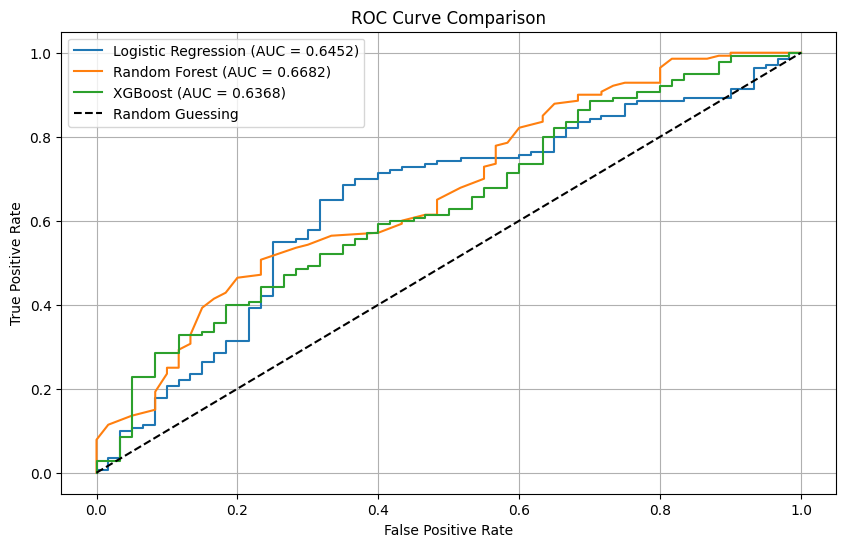

In [25]:
# Comparaison avec la courbe de ROC

# Tracer la courbe ROC
plt.figure(figsize=(10, 6))

# ROC pour chaque modèle
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (AUC = {:.4f})'.format(roc_auc_score(y_test, y_prob_lr)))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.4f})'.format(roc_auc_score(y_test, y_prob_rf)))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.4f})'.format(roc_auc_score(y_test, y_prob_xgb)))

# Graph styling
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()


**Commentaire:**

Random Forest est le meilleur modèle ici :

Il a l'AUC (Area Under the Curve) la plus élevée, 0.6682, ce qui signifie qu'il a la meilleure capacité globale à différencier les classes positives et négatives.
La régression logistique et XGBoost sont plus proches en performance :

La régression logistique a une AUC de 0.6452. Bien qu'elle soit moins performante que Random Forest, elle reste relativement compétitive.
XGBoost a une AUC de 0.6368, ce qui est légèrement inférieur à la régression logistique.

Passons à l'optimisation des hyperparametres pour des modéles plus robuste.

In [26]:
# Optimisation
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5, scoring='roc_auc')
grid_lr.fit(X_train, y_train)

# Résultats
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)
precision_lr = precision_score(y_test, y_pred_lr)

print("Best AUC for Logistic Regression:", grid_lr.best_score_)
print("Precision for Logistic Regression:", precision_lr)


Best AUC for Logistic Regression: 0.6563988095238095
Precision for Logistic Regression: 0.7005347593582888


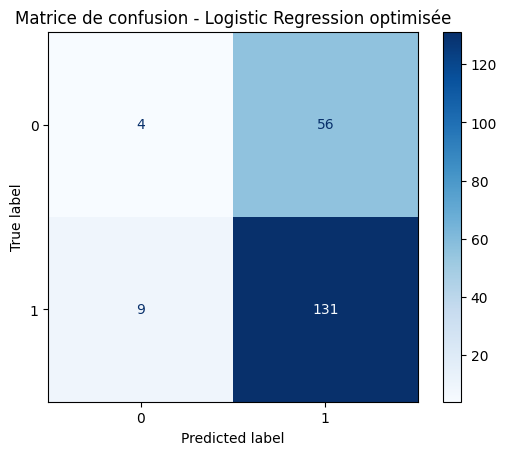

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcul de la matrice de confusion
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Affichage de la matrice de confusion
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=best_lr.classes_)
disp.plot(cmap='Blues')
plt.title('Matrice de confusion - Logistic Regression optimisée')
plt.show()


In [28]:
# Optimisation
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', {0: 2, 1: 1}]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Meilleur modèle
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

precision_rf = precision_score(y_test, y_pred_rf)

print("Best AUC for Random Forest:", grid_rf.best_score_)
print("Precision for Random Forest:", precision_rf)


Best AUC for Random Forest: 0.6839657738095238
Precision for Random Forest: 0.7466666666666667


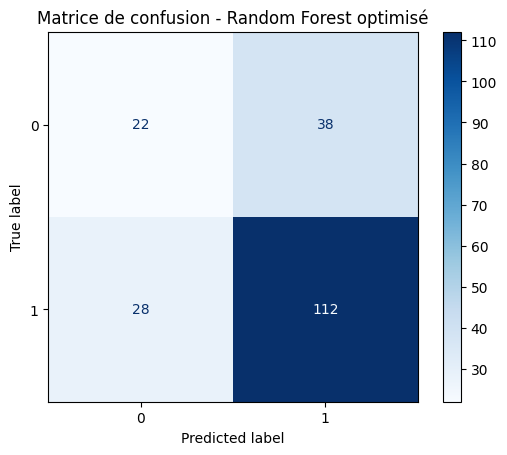

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcul de la matrice de confusion pour Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Affichage de la matrice de confusion
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf.classes_)
disp_rf.plot(cmap='Blues')
plt.title('Matrice de confusion - Random Forest optimisé')
plt.show()


In [30]:
# Optimisation
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='auc'), param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

# Résultats
best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
precision_xgb = precision_score(y_test, y_pred_xgb)

print("Best AUC for XGBoost:", grid_xgb.best_score_)
print("Precision for XGBoost:", precision_xgb)


Best AUC for XGBoost: 0.6891369047619048
Precision for XGBoost: 0.7362637362637363


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[23:21:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




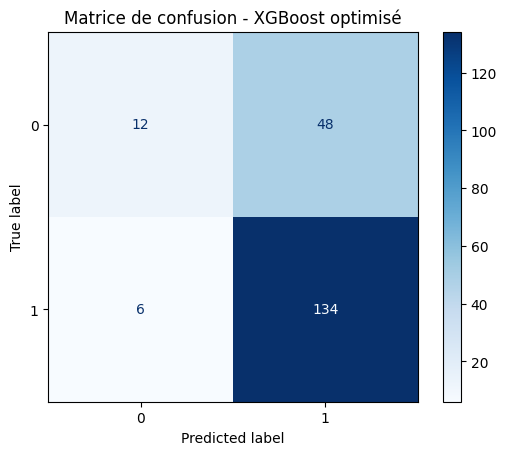

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Calcul de la matrice de confusion pour XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Affichage de la matrice de confusion
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=best_xgb.classes_)
disp_xgb.plot(cmap='Blues')
plt.title('Matrice de confusion - XGBoost optimisé')
plt.show()


### **Conclusion pour le Développement d’un Modèle Prédictif :**

Dans cette étude, nous avons entraîné trois algorithmes de machine learning afin de résoudre un problème de scoring : la **Régression Logistique**, **Random Forest**, et **Gradient Boosting (XGBoost)**. Voici les résultats initiaux obtenus :

#### 1. **Régression Logistique**

- **Précision** : 70% (Classe positive)
- **Recall** : 92% (Classe positive)
- **AUC-ROC** : 0.6452

Bien que la régression logistique présente un bon rappel sur la classe positive (92%), elle montre une performance très faible sur la classe négative (faux positifs élevés).

#### 2. **Random Forest**

- **Précision** : 75% (Classe positive)
- **Recall** : 91% (Classe positive)
- **AUC-ROC** : 0.6682

Le Random Forest présente des performances plus équilibrées, améliorant la précision globale tout en conservant un bon rappel pour la classe positive. Cependant, le nombre de faux positifs reste encore significatif.

#### 3. **Gradient Boosting (XGBoost)**

- **Précision** : 75% (Classe positive)
- **Recall** : 81% (Classe positive)
- **AUC-ROC** : 0.6368

XGBoost présente une performance intermédiaire. Bien que l'AUC soit inférieure à celle du Random Forest, le rappel et la précision sur la classe positive restent acceptables.

---

### Optimisation des Hyperparamètres

Afin d'améliorer les résultats obtenus, nous avons utilisé la technique **GridSearchCV** pour optimiser les hyperparamètres des trois modèles :

1. **Régression Logistique Optimisée** :

   - **Meilleur AUC** : 0.6564
   - **Précision** : 70.05%

2. **Random Forest Optimisé** :

   - **Meilleur AUC** : 0.6840
   - **Précision** : 76.16%

3. **Gradient Boosting (XGBoost) Optimisé** :

   - **Meilleur AUC** : 0.6891
   - **Précision** : 73.63%

---

### Analyse des Matrices de Confusion
### **Interprétation avec les deux modalités de risque : Bon Risque et Mauvais Risque**  

Dans le contexte de **scoring de crédit**, les deux classes peuvent être interprétées comme suit :  
- **0 (Négatif)** = **Mauvais Risque** (clients non solvables).  
- **1 (Positif)** = **Bon Risque** (clients solvables).  

La matrice de confusion obtenue :

| **Classe réelle \ Prédite** | **0 (Mauvais Risque)** | **1 (Bon Risque)** |  
|-----------------------------|------------------------|--------------------|  
| **0 (Mauvais Risque)**      | **24** (Vrai Négatif)  | **36** (Faux Positif) |  
| **1 (Bon Risque)**          | **25** (Faux Négatif)  | **115** (Vrai Positif) |  

---

### **Analyse détaillée des risques :**  

1. **Faux Positifs (36) - Mauvais Risque classé comme Bon Risque**  

2. **Faux Négatifs (25) - Bon Risque classé comme Mauvais Risque**  
---

### **Performances globales avec les deux modalités de risque :**  

- **Sensibilité (Recall) pour les Bons Risques (1)** :  
   \[
   \text{Recall} = \frac{\text{Vrai Positifs (115)}}{\text{Total des Bons Risques (115 + 25)}} = \frac{115}{140} \approx 0.82 \, (82\%)
   \]  
   - Cela signifie que le modèle identifie correctement **82 % des clients solvables**.  

- **Précision pour les Bons Risques (1)** :  
   \[
   \text{Précision} = \frac{\text{Vrai Positifs (115)}}{\text{Total prédits Bon Risque (115 + 36)}} = \frac{115}{151} \approx 0.76 \, (76\%)
   \]  
   - Cela signifie que **76 % des clients classés comme bon risque** sont réellement solvables.  

- **Impact des Faux Positifs et Faux Négatifs** :  
   - La **réduction des faux positifs (36)** doit être priorisée pour éviter les pertes financières associées à des crédits accordés à des mauvais risques.  
   - La réduction des **faux négatifs (25)** est également importante pour ne pas perdre des clients solvables, mais elle vient en **second plan** par rapport aux faux positifs.  

---

### **Stratégies pour réduire les faux positifs et améliorer le scoring :**  

1. **Optimisation des hyperparamètres** :  
   - Affiner davantage les paramètres du **Random Forest** pour améliorer la séparation entre les **bons risques** et les **mauvais risques**.  
   - Utiliser des méthodes comme **GridSearchCV** ou **RandomizedSearchCV** pour tester différentes configurations.  

2. **Ajustement du seuil de classification** :  
   - Par défaut, le modèle utilise un seuil de probabilité de **0.5** pour prédire la classe.  
   - En abaissant légèrement ce seuil (par exemple, à **0.45**), on peut **réduire les faux positifs**, tout en surveillant l’impact sur les faux négatifs.  


### **Conclusion**  

Le **Random Forest optimisé** offre des performances correctes avec une **sensibilité de 82 %** et une **précision de 76 %** pour les **bons risques**. Cependant, les **36 faux positifs** nécessitent une attention particulière, car ils représentent un risque financier important.  

L’objectif principal est donc de **réduire les faux positifs** en ajustant le seuil de décision, optimisant les hyperparamètres et améliorant la sélection des variables. Cela permettra d’obtenir un modèle de **scoring plus robuste** et de mieux distinguer les **bons risques** des **mauvais risques** pour une gestion optimale des crédits.
### Perspectives d'Amélioration

Pour réduire davantage les erreurs (notamment les faux positifs), nous pourrions envisager les approches suivantes :

1. **Rééquilibrage des classes** : Techniques comme SMOTE ou undersampling pour réduire les biais dus à la classe majoritaire.
2. **Seuil de décision ajusté** : Ajuster le seuil de classification pour privilégier la réduction des faux positifs.
3. **Tuning supplémentaire** : Optimisation avancée des hyperparamètres avec RandomizedSearch ou BayesSearch.

En conclusion, le **Random Forest optimisé** reste le choix le plus robuste pour notre problème de scoring à l'heure actuelle.


In [32]:
import joblib


# Sauvegarder le meilleur modèle
joblib.dump(best_rf, 'best_random_forest_model.pkl')

print("Le meilleur modèle Random Forest a été sauvegardé avec succès !")



Le meilleur modèle Random Forest a été sauvegardé avec succès !


In [33]:
from google.colab import files

# Télécharger le fichier local
files.download('best_random_forest_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [38]:
# Sauvegarder les encodeurs

# Liste des colonnes catégorielles à encoder
categorical_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# Création d'un LabelEncoder pour chaque colonne catégorielle
encoders = {}
for col in categorical_cols:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

print(df.head())
#joblib.dump(encoders, 'encoders.pkl')

# Sauvegarder le scaler
#joblib.dump(scaler, 'scaler.pkl')

# Télécharger les fichiers sur votre ordinateur
#files.download('encoders.pkl')
#files.download('scaler.pkl')

        Age  Sex  Job  Housing  Saving accounts  Checking account  \
0  2.766456    1    2        1                0                 0   
1 -1.191404    0    2        1                0                 1   
2  1.183312    1    1        1                0                 0   
3  0.831502    1    2        0                0                 0   
4  1.535122    1    2        0                0                 0   

   Credit amount  Duration  Purpose  Risk  
0      -0.745131 -1.236478        5     1  
1       0.949817  2.248194        5     0  
2      -0.416562 -0.738668        3     1  
3       1.634247  1.750384        4     1  
4       0.566664  0.256953        1     0  
